In [ ]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://raw.githubusercontent.com/fernandomichael17/capstone-nlp-project/main/data/dataset_kalimat_kasar_baik_terbaru_final.csv"
df_additional = pd.read_csv(url)
df_additional.head()

,kalimat,label
0,anjing,1
1,anjinglah,1
2,Nurani anjingmu kebanyakan makan anjing sama b...,1
3,iyadeeh netizen paling suci kesel anj ama yg k...,1
4,ehhh goblok lu jgn mentang2 dia cogan terus lu...,1


In [ ]:
df_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   kalimat  2795 non-null   object
 1   label    2795 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.8+ KB


In [ ]:
print(df_additional['label'].value_counts())


label
1    1736
0    1059
Name: count, dtype: int64


array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

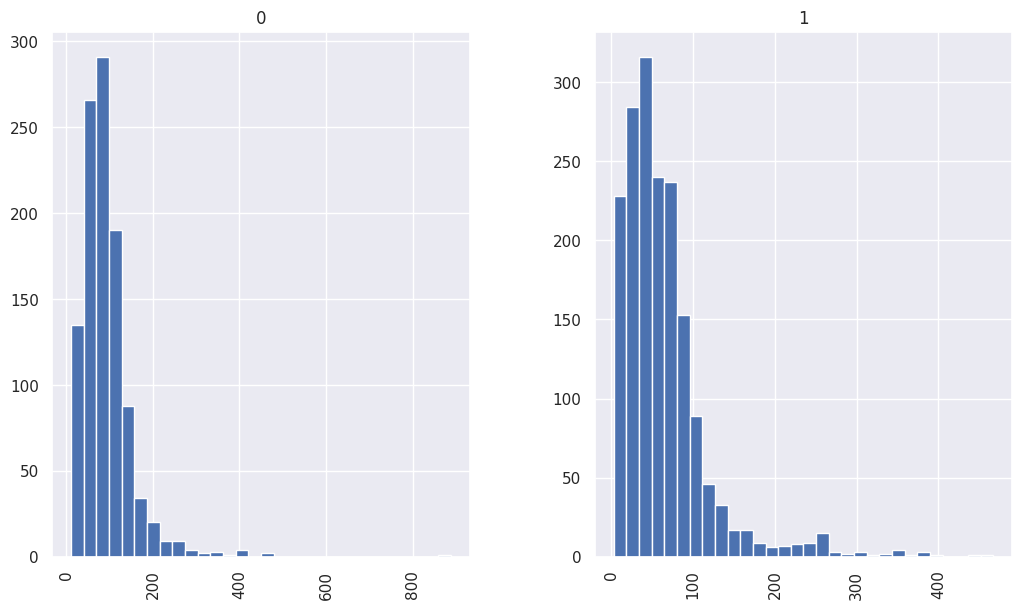

In [ ]:
df_additional['length'] = df_additional['kalimat'].apply(len)
df_additional.hist(column='length', by='label', bins=30, figsize=(12,7))

In [ ]:
df_additional.sample(10)

,kalimat,label,length
1116,"Bangsat anjing, otak kontol si babi..!",1,38
1383,"Dan lapang dada terima apapun, positif aja kal...",0,78
1703,Tidak sengaja banting (mereka bisa tau ini),0,44
2745,"<USERNAME> justru karena ka bella sholehah, p...",0,132
1759,Pas jatuh cinta dan punya pacar baru jg masih ...,0,101
100,tampol,1,6
821,JANGAN JANJIIN GUA APAPUN KALO GABISA NEPATIN ...,1,61
2299,Berhenti jadi anak biadab agar bisa geser ke a...,1,58
1326,"Masuk kamar, sprei kenceng, bantal rapi, lipet...",0,70
863,asw bisa2nya ngomong pake jawa model gt anjg j...,1,67


In [ ]:
import re

def preprocces_sentences(data):
    temp_sentence = []

    for sentence in data:
        sentence = re.sub(r"(?:\@|https?\://)\S+", "", sentence)

        # removal of links[https://blabala.com]
        sentence = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", sentence)
        sentence = re.sub(r"http\S+", "", sentence)

        # Delete <USERNAME>
        sentence = re.sub(r"<[^>]+>", "", sentence, flags=re.IGNORECASE)

        # removal of new line
        sentence = re.sub('\n', '', sentence)

        # removal of RT
        sentence = re.sub('RT', '', sentence)

        # removal of punctuations and numbers
        sentence = re.sub("[^a-zA-Z^']", " ", sentence)
        sentence = re.sub(" {2,}", " ", sentence)

        # remove leading and trailing whitespace
        sentence = sentence.strip()

        # remove whitespace with a single space
        sentence = re.sub(r'\s+', ' ', sentence)

        # convert text to Lowercase
        sentence = sentence.lower()
        temp_sentence.append(sentence)

    return temp_sentence


In [ ]:
df_additional['proccesed_text']=(preprocces_sentences(df_additional['kalimat']))
df_additional.head()

,kalimat,label,length,proccesed_text
0,anjing,1,6,anjing
1,anjinglah,1,9,anjinglah
2,Nurani anjingmu kebanyakan makan anjing sama b...,1,92,nurani anjingmu kebanyakan makan anjing sama b...
3,iyadeeh netizen paling suci kesel anj ama yg k...,1,74,iyadeeh netizen paling suci kesel anj ama yg k...
4,ehhh goblok lu jgn mentang2 dia cogan terus lu...,1,255,ehhh goblok lu jgn mentang dia cogan terus lu ...


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)

In [ ]:
df_additional['tokenized'] = tokenized(df_additional['proccesed_text'])
df_additional.head()

,kalimat,label,length,proccesed_text,tokenized
0,anjing,1,6,anjing,[anjing]
1,anjinglah,1,9,anjinglah,[anjinglah]
2,Nurani anjingmu kebanyakan makan anjing sama b...,1,92,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ..."
3,iyadeeh netizen paling suci kesel anj ama yg k...,1,74,iyadeeh netizen paling suci kesel anj ama yg k...,"[iyadeeh, netizen, paling, suci, kesel, anj, a..."
4,ehhh goblok lu jgn mentang2 dia cogan terus lu...,1,255,ehhh goblok lu jgn mentang dia cogan terus lu ...,"[ehhh, goblok, lu, jgn, mentang, dia, cogan, t..."


In [ ]:
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(sentence) for sentence in data]

In [ ]:
df_additional['stemmed'] = df_additional['tokenized'].apply(stemming)
df_additional.head()

,kalimat,label,length,proccesed_text,tokenized,stemmed
0,anjing,1,6,anjing,[anjing],[anjing]
1,anjinglah,1,9,anjinglah,[anjinglah],[anjing]
2,Nurani anjingmu kebanyakan makan anjing sama b...,1,92,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ..."
3,iyadeeh netizen paling suci kesel anj ama yg k...,1,74,iyadeeh netizen paling suci kesel anj ama yg k...,"[iyadeeh, netizen, paling, suci, kesel, anj, a...","[iyadeeh, netizen, paling, suci, kesel, anj, a..."
4,ehhh goblok lu jgn mentang2 dia cogan terus lu...,1,255,ehhh goblok lu jgn mentang dia cogan terus lu ...,"[ehhh, goblok, lu, jgn, mentang, dia, cogan, t...","[ehhh, goblok, lu, jgn, mentang, dia, cogan, t..."


In [ ]:
df_additional['stemmed'][790]

['kecik',
 'kecik',
 'taknak',
 'mampus',
 'dah',
 'besar',
 'jadi',
 'sokong',
 'israel']

In [ ]:
import requests

slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_word_slang = eval(slang_word)

In [ ]:
dict_word_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [ ]:
slang_df = pd.DataFrame(dict_word_slang.items(), columns=['Old', 'New'])
slang_df.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [ ]:
slang_df['Old'] = slang_df['Old'].apply(lambda x: x.strip())
slang_df['New'] = slang_df['New'].apply(lambda x: x.strip())

In [ ]:
slang_dict = {}
for i, row in slang_df.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [ ]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [ ]:
df_additional['no_slang'] = df_additional['stemmed'].apply(removeSlang)
df_additional.head()

,kalimat,label,length,proccesed_text,tokenized,stemmed,no_slang
0,anjing,1,6,anjing,[anjing],[anjing],[anjing]
1,anjinglah,1,9,anjinglah,[anjinglah],[anjing],[anjing]
2,Nurani anjingmu kebanyakan makan anjing sama b...,1,92,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, banyak, makan, anjing, sama, ..."
3,iyadeeh netizen paling suci kesel anj ama yg k...,1,74,iyadeeh netizen paling suci kesel anj ama yg k...,"[iyadeeh, netizen, paling, suci, kesel, anj, a...","[iyadeeh, netizen, paling, suci, kesel, anj, s...","[iyadeeh, netizen, paling, suci, kesel, anj, s..."
4,ehhh goblok lu jgn mentang2 dia cogan terus lu...,1,255,ehhh goblok lu jgn mentang dia cogan terus lu ...,"[ehhh, goblok, lu, jgn, mentang, dia, cogan, t...","[ehhh, bodoh, kamu, jangan, mentang, dia, coga...","[ehhh, bodoh, kamu, jangan, mentang, dia, coga..."


In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
df_additional['no_stop']=removeStopWords(df_additional['no_slang'])
df_additional.head()

,kalimat,label,length,proccesed_text,tokenized,stemmed,no_slang,no_stop
0,anjing,1,6,anjing,[anjing],[anjing],[anjing],[anjing]
1,anjinglah,1,9,anjinglah,[anjinglah],[anjing],[anjing],[anjing]
2,Nurani anjingmu kebanyakan makan anjing sama b...,1,92,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, makan, anjing, babi, tingka, ..."
3,iyadeeh netizen paling suci kesel anj ama yg k...,1,74,iyadeeh netizen paling suci kesel anj ama yg k...,"[iyadeeh, netizen, paling, suci, kesel, anj, a...","[iyadeeh, netizen, paling, suci, kesel, anj, s...","[iyadeeh, netizen, paling, suci, kesel, anj, s...","[iyadeeh, netizen, suci, kesel, anj, kmaren, h..."
4,ehhh goblok lu jgn mentang2 dia cogan terus lu...,1,255,ehhh goblok lu jgn mentang dia cogan terus lu ...,"[ehhh, goblok, lu, jgn, mentang, dia, cogan, t...","[ehhh, bodoh, kamu, jangan, mentang, dia, coga...","[ehhh, bodoh, kamu, jangan, mentang, dia, coga...","[ehhh, bodoh, mentang, cogan, bela, iya, anjin..."


In [ ]:
df_additional['final'] = df_additional['no_stop'].apply(lambda x: ' '.join(x))
df_additional.head()

,kalimat,label,length,proccesed_text,tokenized,stemmed,no_slang,no_stop,final
0,anjing,1,6,anjing,[anjing],[anjing],[anjing],[anjing],anjing
1,anjinglah,1,9,anjinglah,[anjinglah],[anjing],[anjing],[anjing],anjing
2,Nurani anjingmu kebanyakan makan anjing sama b...,1,92,nurani anjingmu kebanyakan makan anjing sama b...,"[nurani, anjingmu, kebanyakan, makan, anjing, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, banyak, makan, anjing, sama, ...","[nurani, anjing, makan, anjing, babi, tingka, ...",nurani anjing makan anjing babi tingka laku be...
3,iyadeeh netizen paling suci kesel anj ama yg k...,1,74,iyadeeh netizen paling suci kesel anj ama yg k...,"[iyadeeh, netizen, paling, suci, kesel, anj, a...","[iyadeeh, netizen, paling, suci, kesel, anj, s...","[iyadeeh, netizen, paling, suci, kesel, anj, s...","[iyadeeh, netizen, suci, kesel, anj, kmaren, h...",iyadeeh netizen suci kesel anj kmaren hujat si...
4,ehhh goblok lu jgn mentang2 dia cogan terus lu...,1,255,ehhh goblok lu jgn mentang dia cogan terus lu ...,"[ehhh, goblok, lu, jgn, mentang, dia, cogan, t...","[ehhh, bodoh, kamu, jangan, mentang, dia, coga...","[ehhh, bodoh, kamu, jangan, mentang, dia, coga...","[ehhh, bodoh, mentang, cogan, bela, iya, anjin...",ehhh bodoh mentang cogan bela iya anjing mikir...


In [ ]:
data1 = df_additional[['final']]
data2 = df_additional[['label']]
final_dataset = pd.concat([data1, data2], axis=1)
final_dataset.head()

,final,label
0,anjing,1
1,anjing,1
2,nurani anjing makan anjing babi tingka laku be...,1
3,iyadeeh netizen suci kesel anj kmaren hujat si...,1
4,ehhh bodoh mentang cogan bela iya anjing mikir...,1


In [ ]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2795 entries, 0 to 2794
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   final   2795 non-null   object
 1   label   2795 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 43.8+ KB


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
input = final_dataset['final']
label = final_dataset['label']

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(input)
tfidf_vector.shape

(2795, 5509)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, label, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2236, 5509)
(559, 5509)
(2236,)
(559,)


In [ ]:
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

max_tf_idfs = X_train.max(0).toarray()[0]
sorted_tf_idxs = max_tf_idfs.argsort()
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs]

smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [ ]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 labil          0.0
dino           0.0
ngiang         0.0
bc             0.0
dinasehatin    0.0
ngina          0.0
dimusuhin      0.0
ngirim         0.0
dimainin       0.0
dilupain       0.0
dtype: float64


Most important words:
 tolol     1.0
bangga    1.0
bloon     1.0
banci     1.0
gampar    1.0
bakat     1.0
wikwik    1.0
bodo      1.0
bodoh     1.0
bogel     1.0
dtype: float64


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
print(final_dataset[['final']][final_dataset[['label']] == 1])

     final
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
...    ...
2790   NaN
2791   NaN
2792   NaN
2793   NaN
2794   NaN

[2795 rows x 1 columns]


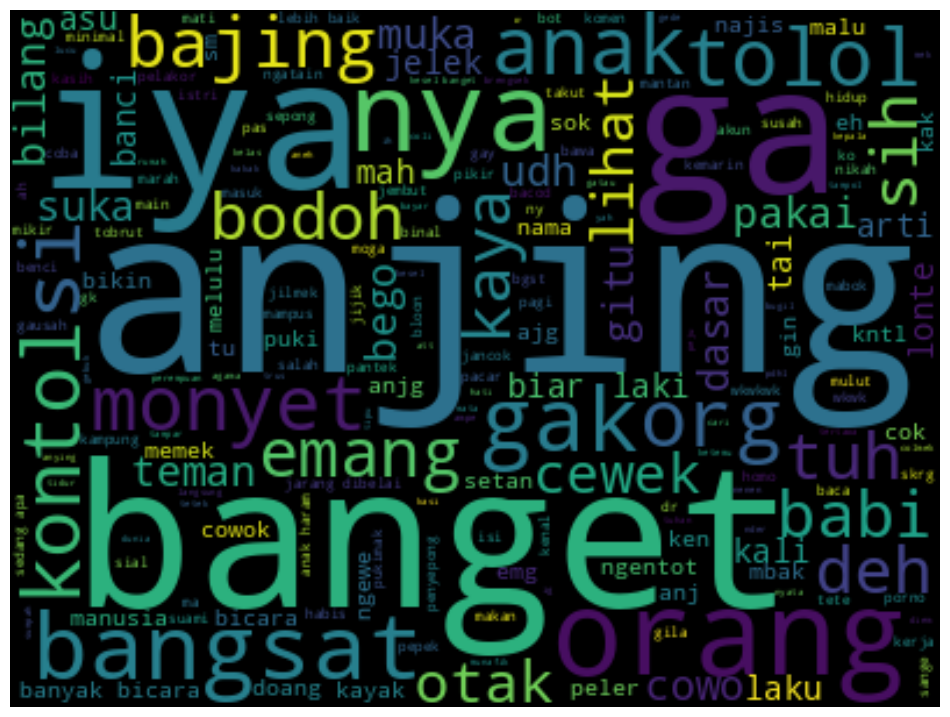

In [ ]:
hs_words = ' '.join([word for word in df_additional['final'][df_additional['label']==1]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(hs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

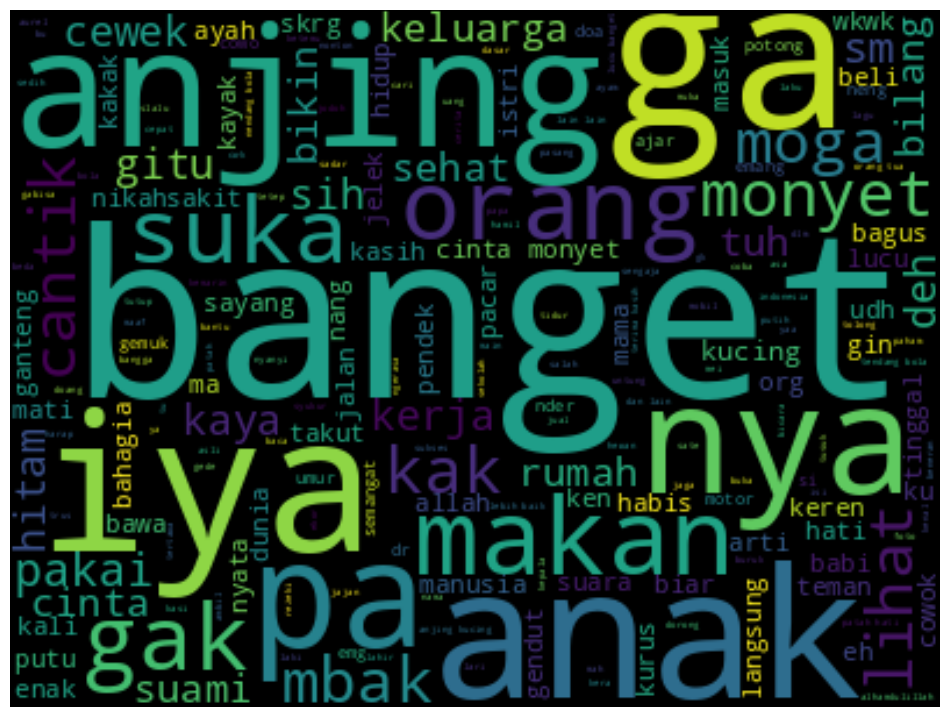

In [ ]:
nonhs_words = ' '.join([word for word in final_dataset['final'][final_dataset['label']==0]])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(nonhs_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [ ]:
# Add model for Neural Network
input_dim = X_train.shape[1]  # Number of features

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(30, input_dim=input_dim, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                165300    
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 15)                240       
                                                                 
 dense_3 (Dense)             (None, 15)                240       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 166261 (649.46 KB)
Trainable params: 166261 (649.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# run model
X_train = X_train.toarray()
X_test = X_test.toarray()

history = model.fit(X_train, y_train, epochs=10, verbose=True, validation_data=(X_test, y_test), batch_size=10)

Epoch 1/10
224/224 [==============================] - 5s 14ms/step - loss: 0.5782 - accuracy: 0.6699 - val_loss: 0.3656 - val_accuracy: 0.8318
Epoch 2/10
224/224 [==============================] - 3s 12ms/step - loss: 0.1613 - accuracy: 0.9575 - val_loss: 0.2146 - val_accuracy: 0.9123
Epoch 3/10
224/224 [==============================] - 2s 9ms/step - loss: 0.0235 - accuracy: 0.9955 - val_loss: 0.2240 - val_accuracy: 0.9213
Epoch 4/10
224/224 [==============================] - 2s 9ms/step - loss: 0.0066 - accuracy: 0.9991 - val_loss: 0.2328 - val_accuracy: 0.9123
Epoch 5/10
224/224 [==============================] - 2s 9ms/step - loss: 0.0033 - accuracy: 0.9996 - val_loss: 0.2748 - val_accuracy: 0.9016
Epoch 6/10
224/224 [==============================] - 2s 11ms/step - loss: 0.0036 - accuracy: 0.9996 - val_loss: 0.2579 - val_accuracy: 0.9123
Epoch 7/10
224/224 [==============================] - 2s 9ms/step - loss: 0.0026 - accuracy: 0.9996 - val_loss: 0.2803 - val_accuracy: 0.9106
Epo

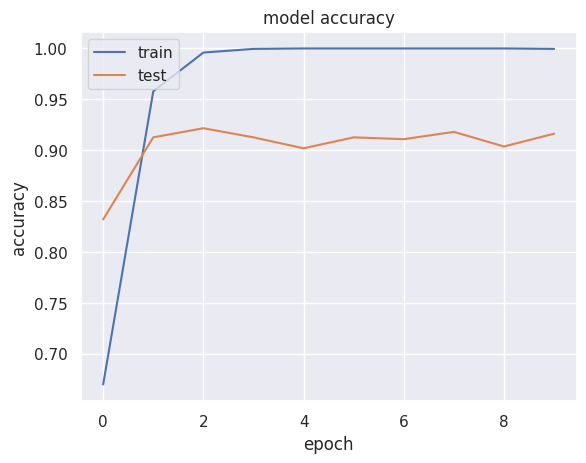

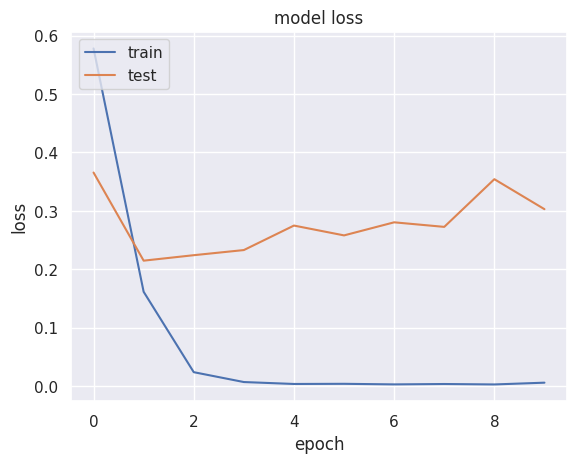

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

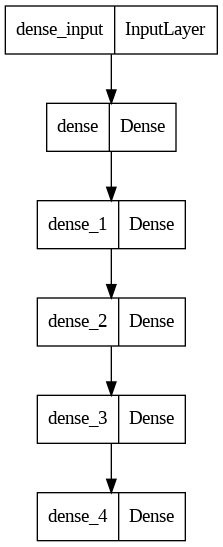

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# Save Model
model.save('model.h5')